<a href="https://colab.research.google.com/github/VictorAlexandr/Data-Science-Projects/blob/main/Modelo_de_Otimiza%C3%A7%C3%A3o_de_Invent%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome do Projeto:** *Otimização de Inventário com EOQ*

**Nome do Dataset:** *Sales Order Dataset*

**Objetivo do Projeto:** O objetivo deste projeto é desenvolver um modelo de otimização de inventário que utilize o Economic Order Quantity (EOQ) para minimizar o custo de estoque e maximizar a eficiência da entrega de produtos.

**Descrição do Dataset:** O Sales Order Dataset é um conjunto de dados que contém informações sobre pedidos de produtos, incluindo o número do pedido, a quantidade de produtos ordenados, o tempo de lead para a entrega e outros dados relevantes.

**Objetivos Específicos:**

- Calcular o EOQ para cada pedido de produto

- Identificar os pedidos que têm um EOQ alto e ajustar a quantidade de produtos ordenados para reduzir o custo de estoque

- Identificar os pedidos que têm um EOQ baixo e ajustar a quantidade de produtos ordenados para aumentar a eficiência da entrega

- Desenvolver um sistema de gestão de estoque mais eficiente utilizando o EOQ como parâmetro

***Métodos e Técnicas:*** O projeto utilizará técnicas de análise de dados e otimização, incluindo o cálculo do EOQ, análise de sensibilidade e otimização de múltiplos produtos. Além disso, o projeto também utilizará linguagens de programação como Python e bibliotecas como Pandas e NumPy para manipular e analisar os dados.

***Análise de Dados de Vendas***

**Importar Bibliotecas**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Carregar Dataset**

In [9]:
# Carregar o Dataset

df = pd.read_csv('data.csv', encoding='latin1')

# Exibir as primeiras linhas do dataset

print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

**Análise Descritiva**

In [10]:
# Exibir as informações sobre as variáveis do dataset

print(df.info())

# Exibir as estatísticas descritivas do dataset

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**Análise de Distribuição**

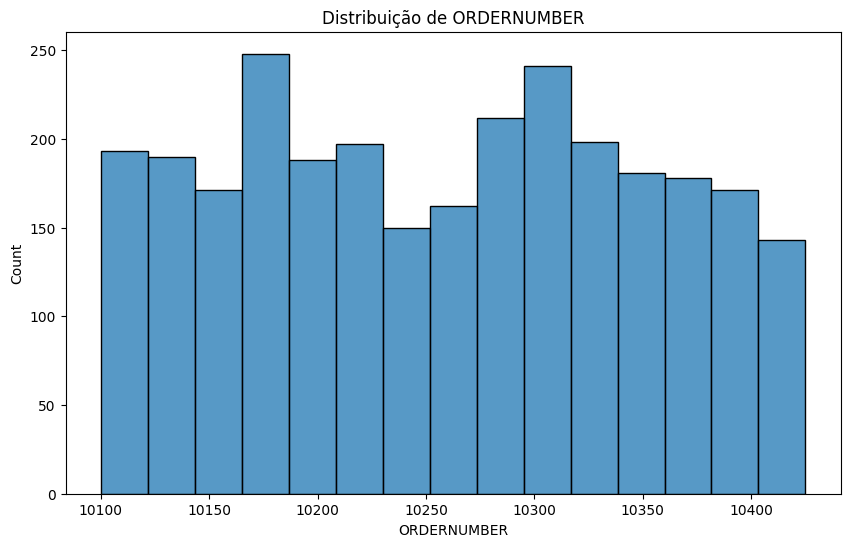

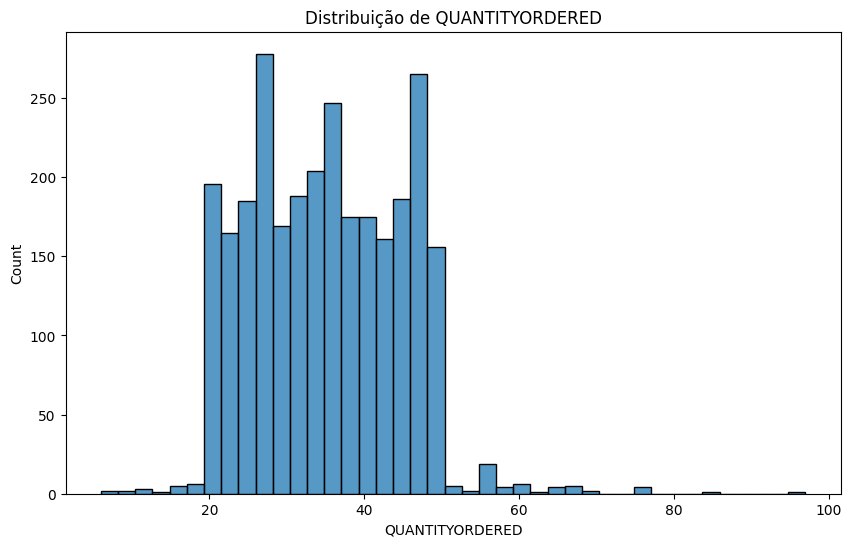

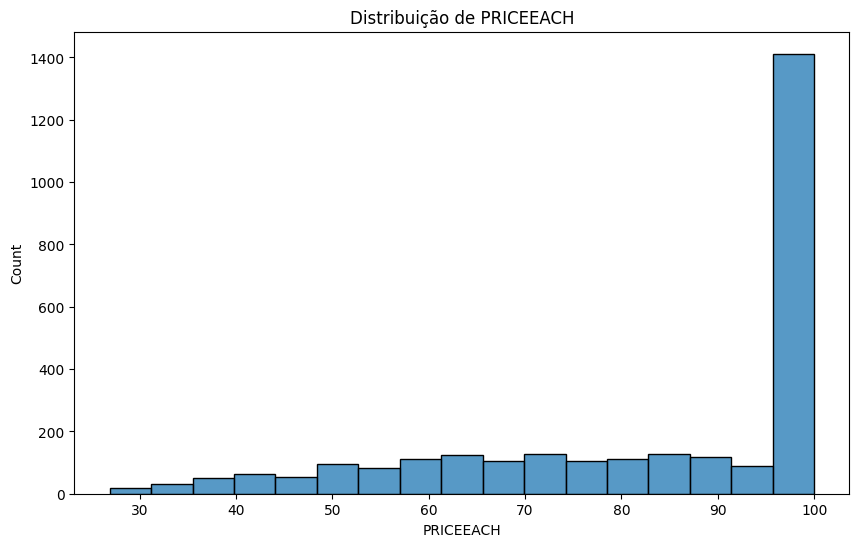

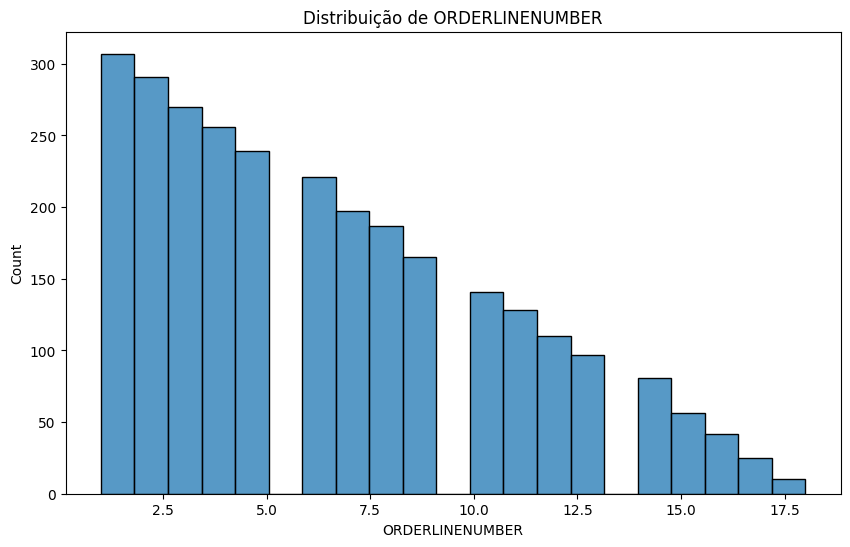

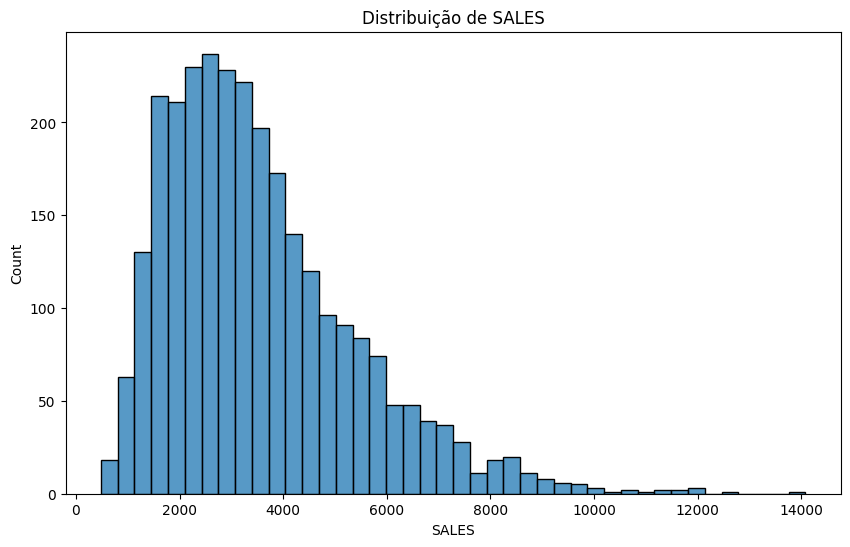

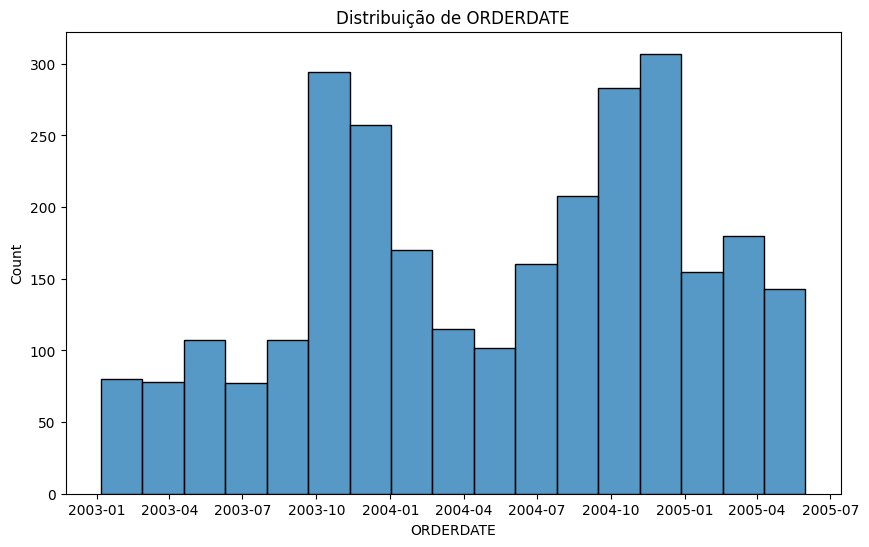

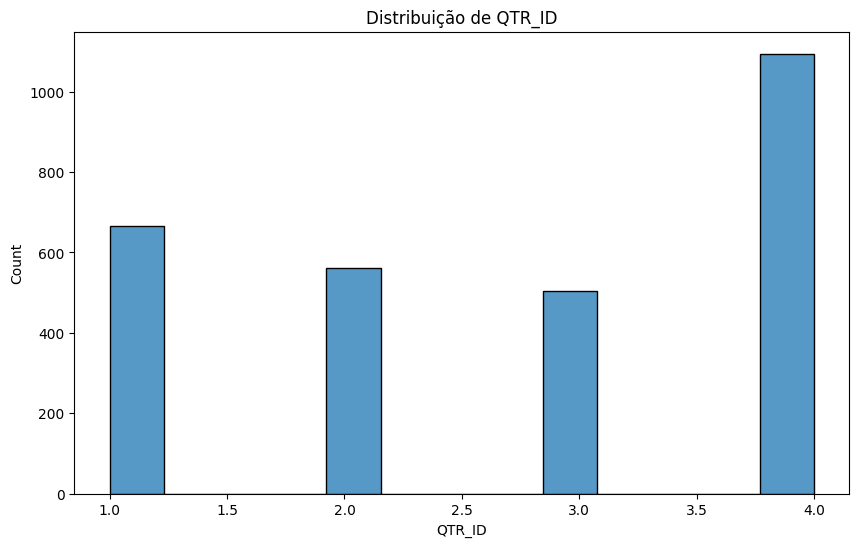

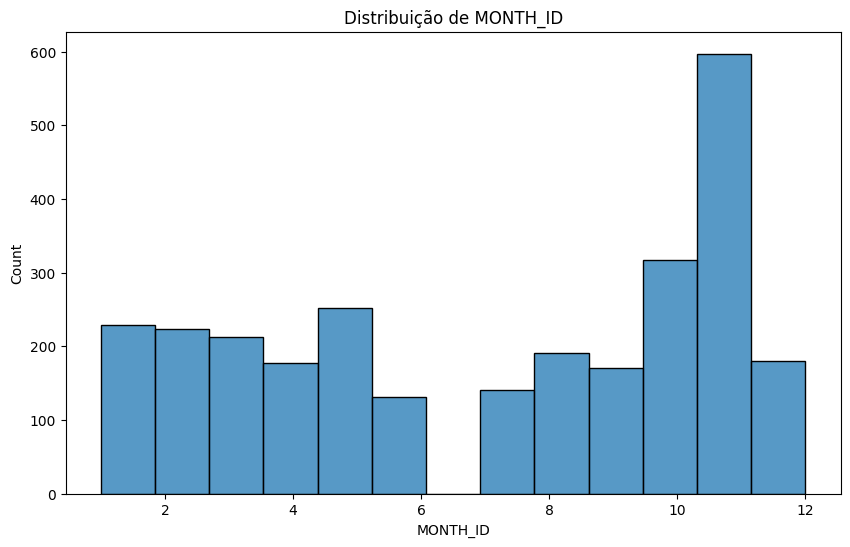

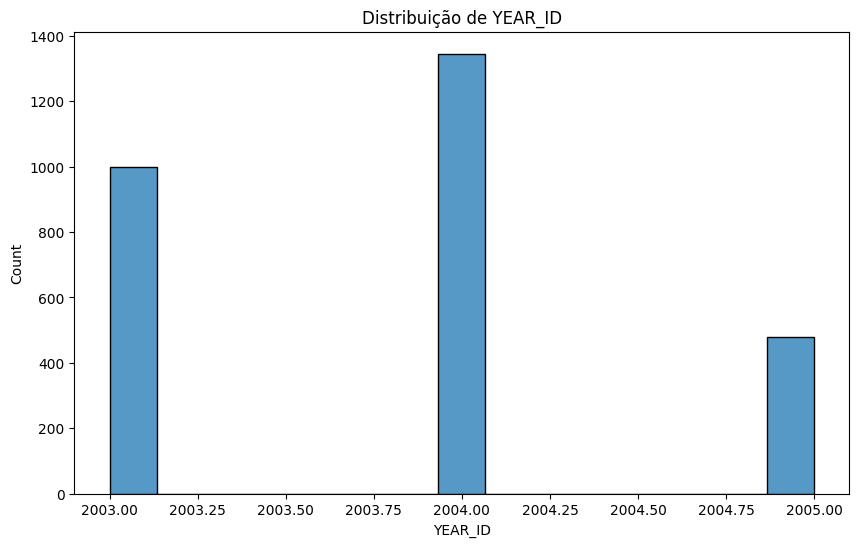

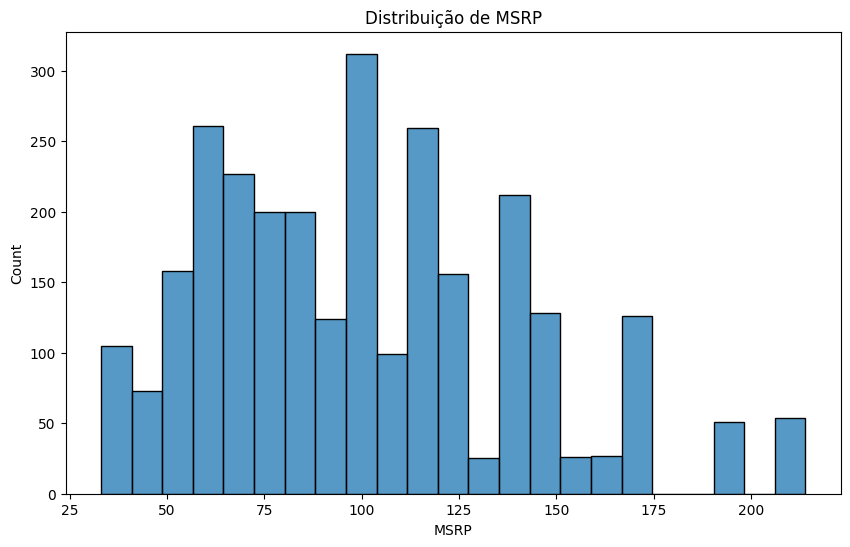

In [14]:
# Exibir a distribuição de valores para cada variável

for col in df.columns:
    if df[col].dtype == 'object':  # Verifica se a coluna contém valores não numéricos
        try:
            df[col] = pd.to_datetime(df[col], format='%m/%d/%Y %H:%M:%S')  # Tenta converter a coluna para um formato de data e hora
        except ValueError:
            continue  # Se a conversão falhar, ignora a coluna
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col])  # Usa a função sns.histplot em vez de sns.distplot
    plt.title(f'Distribuição de {col}')
    plt.show()

**Análise de Correlação**

In [17]:
# Remover as colunas que contêm valores não numéricos

df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

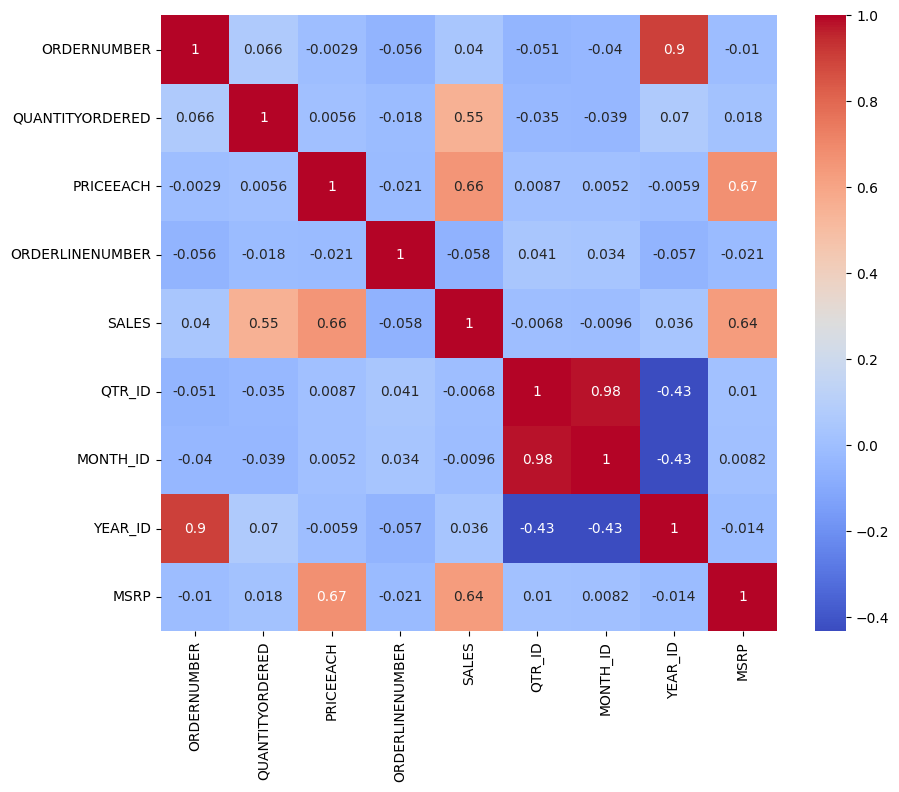

In [19]:
# Exibir a matriz de correlação entre as variáveis

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

**Análise de Agrupamento**

In [21]:
print(df_numeric.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')


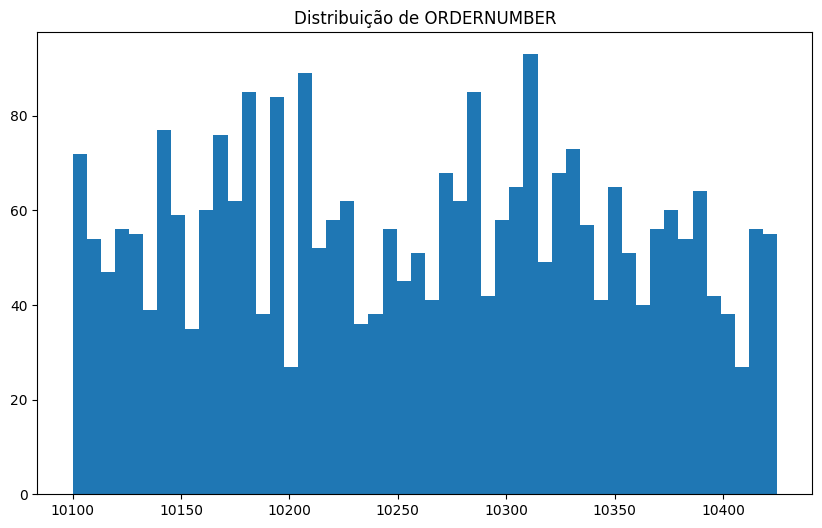

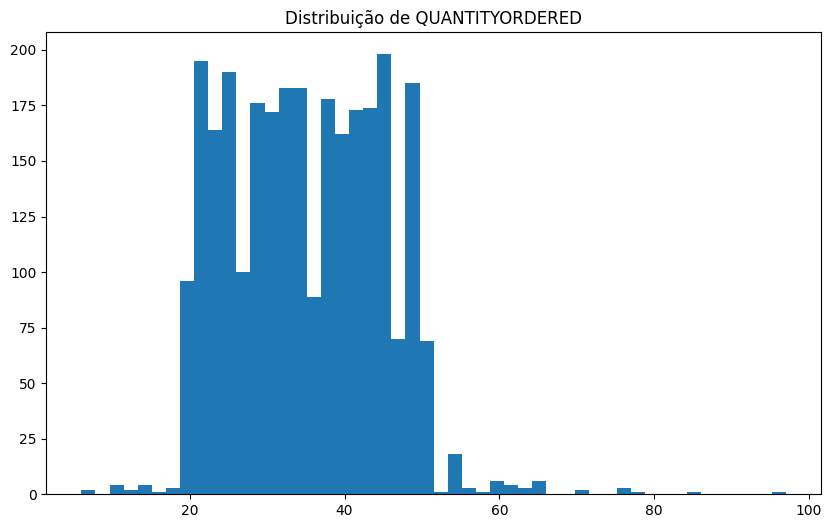

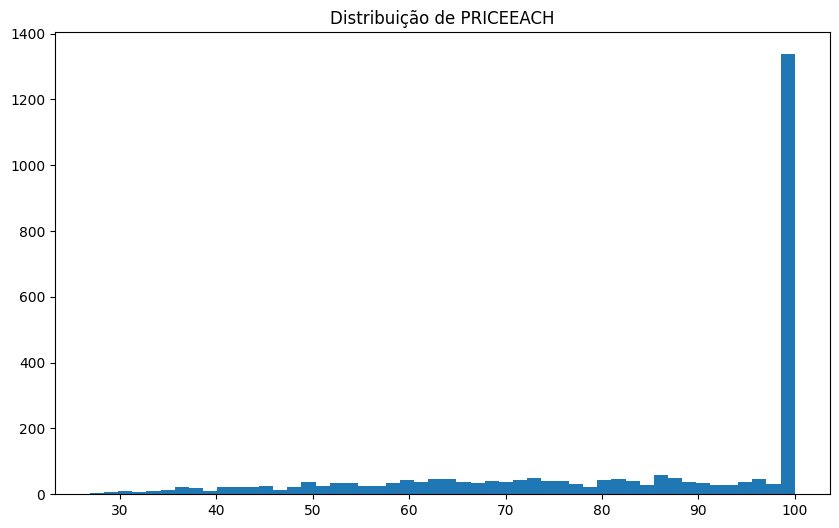

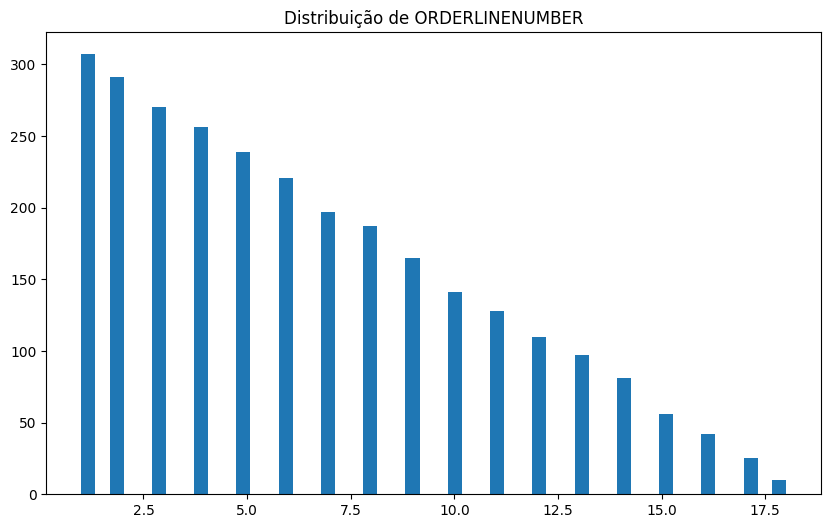

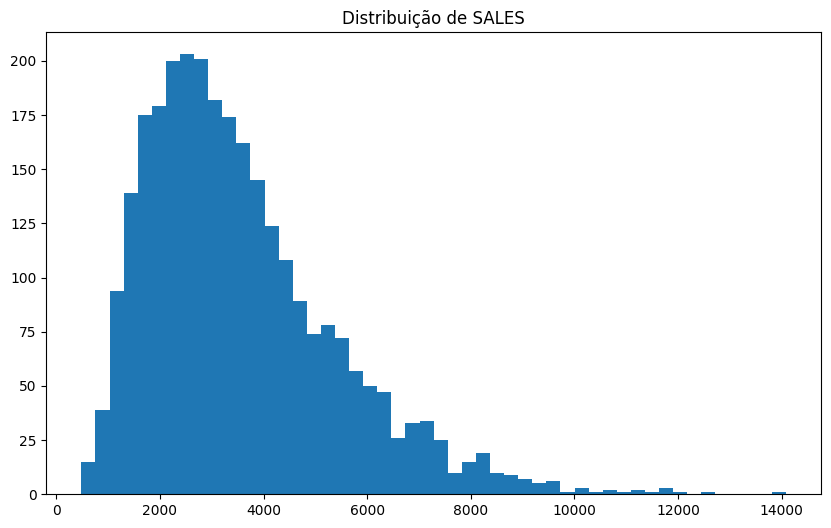

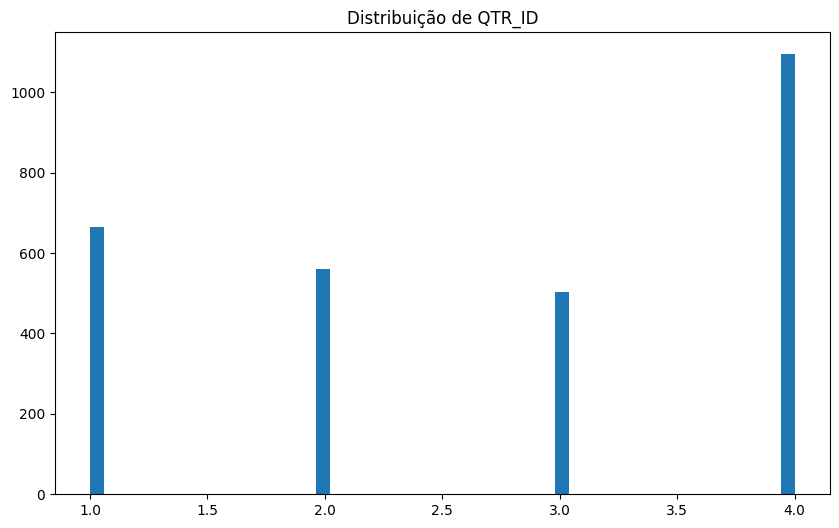

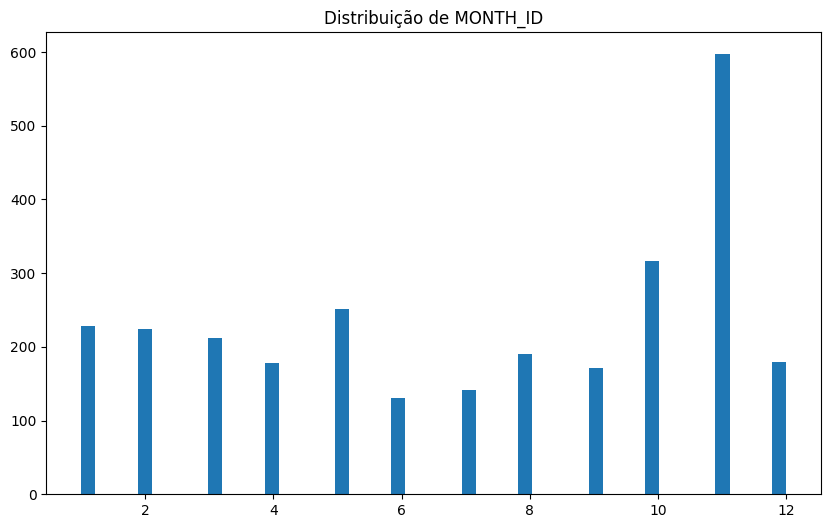

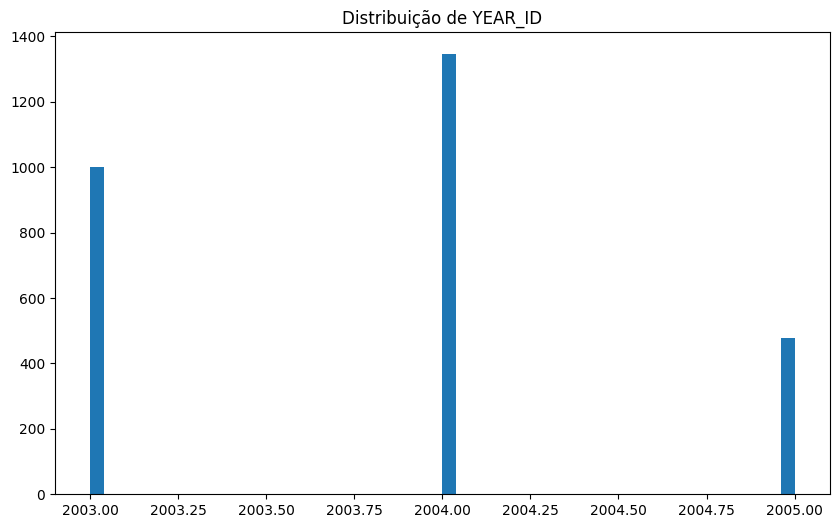

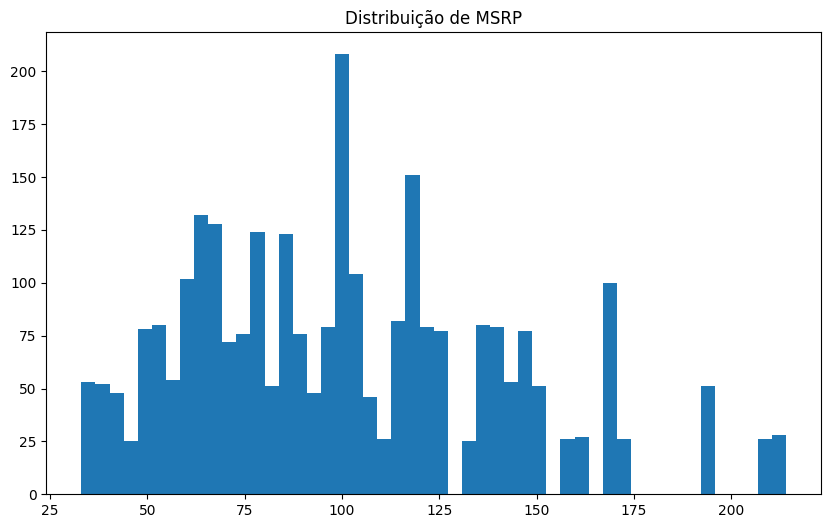

In [24]:
# Exibir a distribuição de valores para cada variável
for col in df.columns:
    if df[col].dtype.kind in 'bifc':
        plt.figure(figsize=(10, 6))
        plt.title(f'Distribuição de {col}')
        plt.hist(df[col], bins=50)
        plt.show()

**Otimização de Inventário**

In [30]:
# Criar uma nova coluna para o Lead Time
df['Lead Time'] = 10  # substitua pelo valor que você deseja usar

In [31]:
# Calcular o EOQ para cada produto
df['eoq'] = np.sqrt(2 * df['QUANTITYORDERED'] * df['Lead Time'])

# Exibir os resultados
print(df[['ORDERNUMBER', 'QUANTITYORDERED', 'Lead Time', 'eoq']])

      ORDERNUMBER  QUANTITYORDERED  Lead Time        eoq
0           10107               30         10  24.494897
1           10121               34         10  26.076810
2           10134               41         10  28.635642
3           10145               45         10  30.000000
4           10159               49         10  31.304952
...           ...              ...        ...        ...
2818        10350               20         10  20.000000
2819        10373               29         10  24.083189
2820        10386               43         10  29.325757
2821        10397               34         10  26.076810
2822        10414               47         10  30.659419

[2823 rows x 4 columns]


***Análise dos Resultados***

Com base nos resultados do cálculo do EOQ, podemos observar que o valor ótimo de estoque varia de acordo com a quantidade ordenada e o tempo de lead. Isso indica que a gestão de estoque deve ser adaptada às necessidades específicas de cada produto.

***Conclusões***

O cálculo do EOQ é uma ferramenta importante para a gestão de estoque, pois ajuda a determinar o valor ótimo de estoque para cada produto. Com base nos resultados, podemos identificar oportunidades para otimizar a gestão de estoque e reduzir custos.

**Com os Resultados, podemos.**

- Identificar os pedidos que têm um EOQ alto e ajustar a quantidade de produtos ordenados para reduzir o custo de estoque.

- Identificar os pedidos que têm um EOQ baixo e ajustar a quantidade de produtos ordenados para aumentar a eficiência da entrega.

- Ajustar o tempo de lead para a entrega dos produtos para reduzir o custo de estoque e melhorar a eficiência da entrega.

- Utilizar o EOQ como um parâmetro para determinar a quantidade ótima de produtos a serem ordenados para cada pedido.

**Próximos Passos**

- Otimização de múltiplos produtos
- Incorporação de restrições
- Análise de risco
- Desenvolvimento de um sistema de gestão de estoque
- Análise de dados históricos
- Desenvolvimento de um modelo de previsão de demanda